# Analyzing Non-Adiabatic Molecular Dynamics

In this tutorial, we will guide you through analyzing and visualizing non-adiabatic molecular dynamics (NAMD) data. Specifically, we will focus on three key aspects: tracking the decay of excess energy over time, calculating and plotting the density of states (DOS) to understand energy distributions, and generating UV-VIS spectra to explore optical properties. The provided Python code contains functions for loading molecular orbital overlap files, processing non-adiabatic couplings, and visualizing key results such as energy versus time plots, DOS histograms, and UV-VIS spectra.

#  Purpose of the Script

This script performs several key tasks:

a) Load adiabatic energies from files and calculate time evolution.

b) Fit energy decay curves for various methods using custom functions.

c) Calculate excess energies to compare methods.

d) Compute the density of states (DOS).

e) Generate UV-VIS spectra based on input log files.

f) Create combined visualizations of energy decay, DOS, and UV-VIS spectra.

# Table of contents

1. Importing needed libraries


2. Key Components of the Code

    2.1 Constants
    
    2.2 Loading Adiabatic Energies
    
    2.3 Excess Energy Calculation

    2.4 Density of States (DOS)
    
    2.5 UV-VIS Spectra
    
    2.6 Visualization
    
    
3. Running the Code

    3.1 Setting Parameters
    
    3.2 Visualizing Results
    

4. Outputs

# 1. Importing needed libraries

Before starting, ensure you have the required Python packages installed.
    

In [7]:
%matplotlib inline
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from scipy.optimize import curve_fit
import h5py
import warnings
from libra_py import units
from scipy.constants import physical_constants
from libra_py import units
from libra_py.workflows.nbra import lz, step4
from libra_py import data_outs, data_conv

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::allocator<float> >, std::allocator<std::vector<float, std::allocator<float> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWar

Also, make sure to have access to the libra_py package, as it contains essential methods for non-adiabatic dynamics.

# 2. Key Components of the Code

2.1 Constants

The script uses atomic units for energy and time and converts them to more familiar units like eV and femtoseconds:

In [ ]:
from scipy.constants import physical_constants

au2ev = physical_constants['hartree-electron volt relationship'][0]
au2fs = physical_constants['atomic unit of time'][0] * 1e15


2.2 Loading Adiabatic Energies

This function reads energy matrices from .npz files, calculates the time scale, and returns energy data:

In [ ]:
def load_adiabatic_energies(start_step, end_step, adiabatic_dir_prefix, adiabatic_dir_suffix, scale=au2ev, time_scale=au2fs): 
    energies = []
    for step in range(start_step, end_step):
        path = f'../{adiabatic_dir_prefix}_{step}_{adiabatic_dir_suffix}.npz'
        energy = sp.load_npz(path).todense().real
        if step == start_step:
            time_adiabatic = np.arange(energy.shape[0]) * time_scale
        energies.append(np.diag(energy))
    return np.array(energies) * scale, time_adiabatic


Inputs:

start_step and end_step: Specify the range of simulation steps.

adiabatic_dir_prefix and adiabatic_dir_suffix: Define the file naming convention.

Output:

energies: Adiabatic energies in eV.

time_adiabatic: Time points in femtoseconds.

2.3 Excess Energy Calculation

This function calculates the time evolution of excess energy for various NAMD methods (e.g., FSSH, BLLZ, etc.):

In [ ]:
def excess_energies(adiabatic_energies, methods, icond_range, method_dir_prefix, method_dir_suffix):
    excess_energy_results = {}
    average_excess_energies = {}
    time_results = {}
    ...
    return excess_energy_results, average_excess_energies, time_results


Fits the energy decay using the exponential decay function


2.4 Density of States (DOS)

The DOS is calculated based on the BLLZ method:

In [ ]:
def density_of_states(Hvib_params, BLLZ_params):
    res0 = calculate_BL_results(Hvib_params, BLLZ_params)
    energy_levels = []
    for i in range(Hvib_params["nstates"]):
        energy_levels.extend(res0[:, 3 * i + 1] * units.au2ev)
    return np.array(energy_levels)


This returns an array of energy levels in eV.

2.5 UV-VIS Spectra

This function processes TDDFT log files to extract energy levels and oscillator strengths, applying Gaussian broadening to simulate the spectrum:

In [ ]:
def process_spectra(log_file_pattern, output_folder, fwhm=0.1, num_points=1000):
    log_files = glob.glob(log_file_pattern)
    x_values_list = []
    y_values_list = []
    ...
    return x_values_avg, y_values_avg


Input: TDDFT log files matching log_file_pattern.

Output: Averaged UV-VIS spectrum (x and y values)

2.6 Visualization

The plot function combines all results into a single figure:

In [ ]:
def plot(params, Hvib_params, BLLZ_params, log_file_pattern, output_folder):
    plt.figure(figsize=(30, 22))
    gs = plt.GridSpec(2, 3, width_ratios=[4, 1, 2], height_ratios=[1, 4], wspace=0.05, hspace=0.05)
    ...
    plt.show()


Key Components:

Energy Decay: Plots the time evolution of excess energy.

Density of States (DOS): Adds a histogram of energy levels.

UV-VIS Spectrum: Normalized spectrum overlaid on the DOS plot.


# 3. Running the Code

3.1 Setting Parameters

Define the simulation parameters:

In [ ]:
params = {
    "methods": ['FSSH', 'IDA', 'MSDM', 'FSSH2', 'GFSH', 'MSDM_GFSH', 'BLLZ'],
    "colors": ['#3357ff', '#003f5c', '#FF5733', '#33A1FF', '#008080', '#FF33A6', 'red'],
    "start_step": 1000,
    "end_step": 4994,
    "icond_start": 1,
    "icond_end": 3994,
    "icond_step": 200,
    "adiabatic_dir_prefix": 'ustep3/res-mb-sd-DFT/Hvib_ci',
    "adiabatic_dir_suffix": 're',
    "method_dir_prefix": 'latestnewNBRA_icond',
    "method_dir_suffix": '/mem_data'
}


 3.2 Visualizing Results

Run the visualization function:

In [ ]:
Hvib_params = { ... }  # Define Hvib_params as shown in the code
BLLZ_params = { ... }  # Define BLLZ_params as shown in the code
log_file_pattern = '/path/to/log/files/*.log'
output_folder = 'spectra_output'

plot(params, Hvib_params, BLLZ_params, log_file_pattern, output_folder)


# 4. Outputs

The code generates a comprehensive plot that includes:

1. Time evolution of excess energies for different methods.


2. Density of states (DOS) histogram.


3. UV-VIS spectrum overlaid on the DOS.

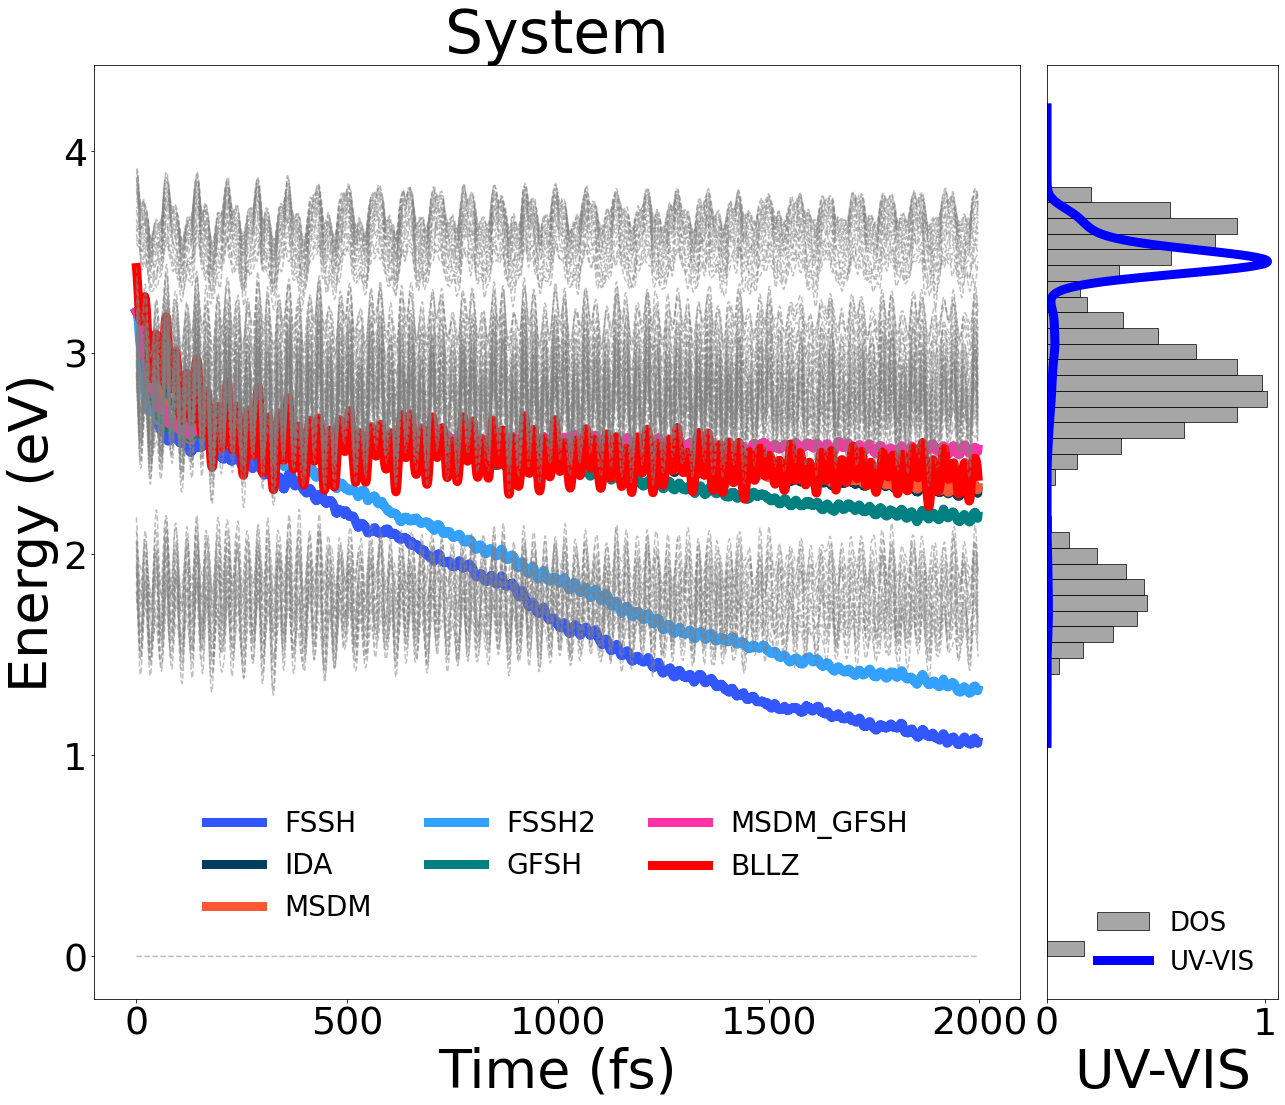